In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


veri = pd.read_csv("/content/Enflasyon_Veri.csv",index_col=0)
print(veri)


            Aylık Enf  Aylık Enf 2HO  Üfe Enf 2HO  B ve C Enf Ort 2HO  \
2003-04-30       0.99          1.475        2.480              1.2250   
2003-05-31       0.96          0.975        0.570              1.4550   
2003-06-30       0.08          0.520       -1.275              1.1900   
2003-07-31      -0.19         -0.055       -1.235              0.7425   
2003-08-31       0.16         -0.015       -0.370              0.5875   
...               ...            ...          ...                 ...   
2023-08-31       9.09          9.290        7.060              9.1850   
2023-09-30       4.75          6.920        4.645              7.1375   
2023-10-31       3.43          4.090        2.670              4.3850   
2023-11-30       3.28          3.355        2.375              2.9225   
2023-12-31       2.93          3.105        1.975              2.2975   

            İTO Enf 2HO  DolarTL 2HO  Petrol (DolarTL) 2HO   Altın 2HO  \
2003-04-30        1.770     1.641292             

In [ ]:
y = veri['Aylık Enf']
x = veri.drop(columns=["Aylık Enf"])

train_size = int(x.shape[0]*0.75)
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:]
y_test = y[train_size:]
print(x_train)
print(x_test)

            Aylık Enf 2HO  Üfe Enf 2HO  B ve C Enf Ort 2HO  İTO Enf 2HO  \
2003-04-30          1.475        2.480              1.2250        1.770   
2003-05-31          0.975        0.570              1.4550        1.040   
2003-06-30          0.520       -1.275              1.1900        0.745   
2003-07-31         -0.055       -1.235              0.7425        0.895   
2003-08-31         -0.015       -0.370              0.5875        0.670   
...                   ...          ...                 ...          ...   
2018-05-31          1.745        3.195              2.0175        2.270   
2018-06-30          2.115        3.410              1.6750        2.000   
2018-07-31          1.580        2.400              1.3550        1.155   
2018-08-31          1.425        4.185              1.6375        2.355   
2018-09-30          4.300        8.740              4.5300        5.135   

            DolarTL 2HO  Petrol (DolarTL) 2HO  Altın 2HO  M3 Değişim 3HO  
2003-04-30     1.641292 

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0)
models,predictions = reg.fit(x_train,x_test,y_train,y_test)
print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 487
[LightGBM] [Info] Number of data points in the train set: 186, number of used features: 8
[LightGBM] [Info] Start training from score 0.749677
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [ ]:
from sklearn.linear_model import LassoLarsIC
from sklearn.metrics import mean_squared_error, r2_score

model = LassoLarsIC(criterion='aic')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Test R2: ", r2_score(y_test, y_pred))
print("Train R2: ", r2_score(y_train, model.predict(x_train)))

MSE:  1.8336192045093067
Test R2:  0.7518132550442025
Train R2:  0.6813844623672858


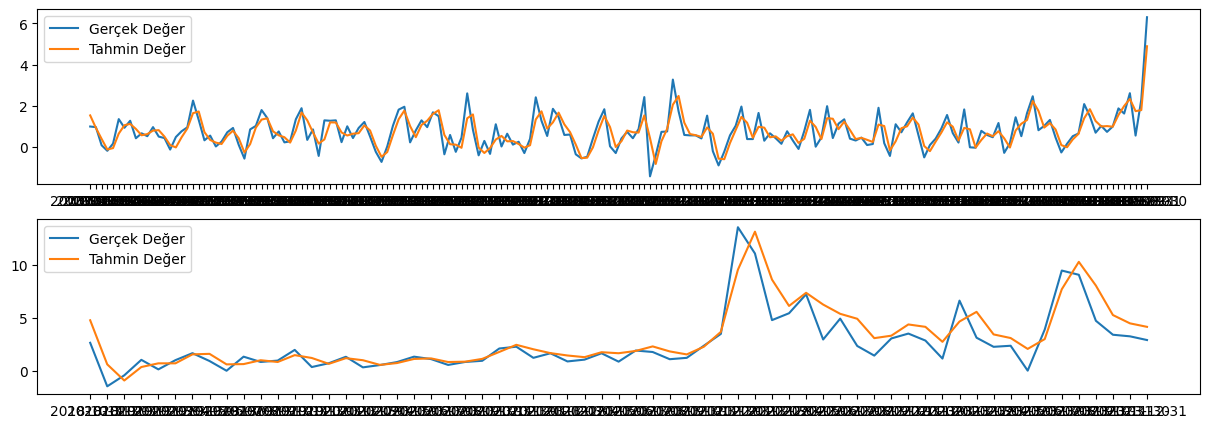

In [ ]:
traintahmin = model.predict(x_train)
testtahmin = model.predict(x_test)

fig,axs = plt.subplots(2,1,figsize=(15,5))
axs[0].plot(y_train,label="Gerçek Değer")
axs[0].plot(traintahmin,label="Tahmin Değer")
axs[0].legend()
axs[1].plot(y_test,label="Gerçek Değer")
axs[1].plot(testtahmin,label="Tahmin Değer")
axs[1].legend()
plt.show()

MSE:  2.4423735375224362
Test R2:  -0.2900049494682684


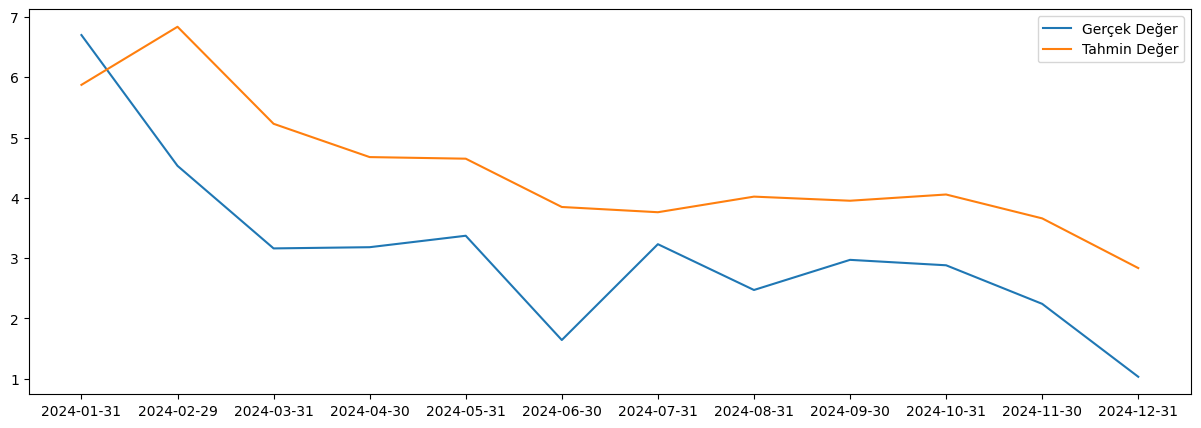

In [ ]:
veri_kont = pd.read_csv("/content/Enflasyon_Kontrol_Veri.csv",index_col=0)

x_kont = veri_kont.drop(columns=["Aylık Enf"])
y_kont = veri_kont["Aylık Enf"]

y_kont_pred = model.predict(x_kont)
print("MSE: ", mean_squared_error(y_kont, y_kont_pred))
print("Test R2: ", r2_score(y_kont, y_kont_pred))

fig,axs = plt.subplots(1,1,figsize=(15,5))
axs.plot(y_kont,label="Gerçek Değer")
axs.plot(y_kont_pred,label="Tahmin Değer")
axs.legend()
plt.show()

In [ ]:
degiskenler = np.where(model.coef_ != 0)[0]
print(x.columns[degiskenler])

Index(['Aylık Enf 2HO', 'Üfe Enf 2HO', 'İTO Enf 2HO', 'Petrol (DolarTL) 2HO'], dtype='object')


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train,y_train)
y_pred = xgb_model.predict(x_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Test R2: ", r2_score(y_test, y_pred))

MSE:  2.789789774966331
Test R2:  0.6223922384445411


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1050,1100,1150,1200,1250,1300,1350,1400,1450,1500]
max_depth = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
booster=['gbtree','gblinear']
learning_rate=np.arange(0,1,0.0001)
min_child_weight=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
base_score=[0.25,0.5,0.75,1]
max_leaves=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
gamma=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,]
max_delta_step=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
subsample=[0.5,0.6,0.7,0.8,0.9,1]
colsample_bytree=[0.5,0.6,0.7,0.8,0.9,1]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    "base_score":base_score,
    "max_leaves":max_leaves,
    "gamma":gamma,
    "max_delta_step":max_delta_step,
    "subsample":subsample,
    "colsample_bytree":colsample_bytree
    }




random_cv = RandomizedSearchCV(estimator=xgb_model,
            param_distributions=hyperparameter_grid,
            cv=10, n_iter=1000,
            scoring = 'neg_mean_squared_error',n_jobs = -1,
            verbose = 5,
            return_train_score = True,
            random_state=42)

random_cv.fit(x_train,y_train)
print(random_cv.best_estimator_)



Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
XGBRegressor(base_score=0.75, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=np.float64(0.9897),
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=15, max_depth=8, max_leaves=12, min_child_weight=9,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=1200, n_jobs=None, num_parallel_tree=None,
             random_state=None, ...)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:22:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "colsample_bytree", "gamma", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
xgb_model_tuned = xgb.XGBRegressor(base_score=0.75, booster='gblinear',learning_rate=0.0097,n_estimators=1200)
xgb_model_tuned.fit(x_train,y_train)
y_pred = xgb_model_tuned.predict(x_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Test R2: ", r2_score(y_test, y_pred))
print("Train R2: ", r2_score(y_train, xgb_model_tuned.predict(x_train)))

MSE:  1.2726927832948134
Test R2:  0.8277365995960964
Train R2:  0.6745553721688281


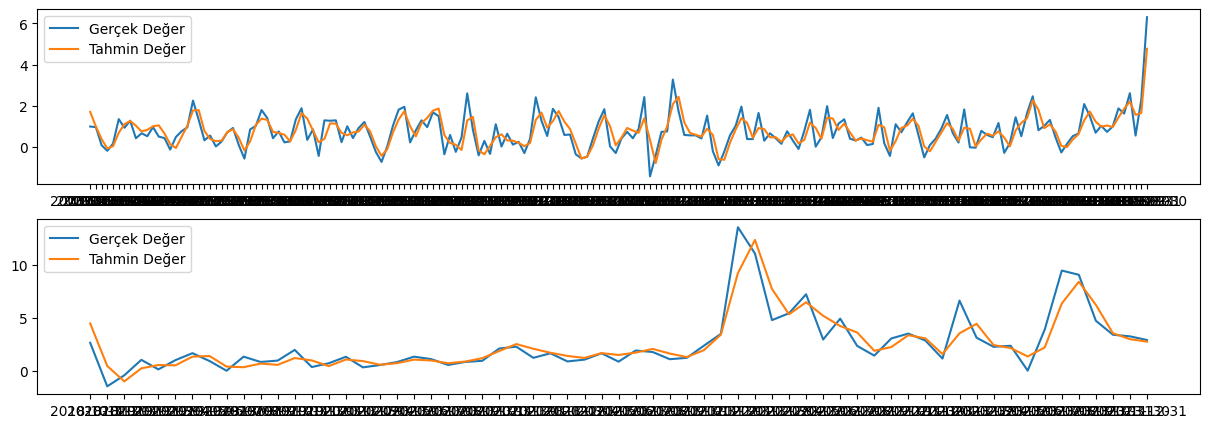

In [ ]:
traintahmin = xgb_model_tuned.predict(x_train)
testtahmin = xgb_model_tuned.predict(x_test)

fig,axs = plt.subplots(2,1,figsize=(15,5))
axs[0].plot(y_train,label="Gerçek Değer")
axs[0].plot(traintahmin,label="Tahmin Değer")
axs[0].legend()
axs[1].plot(y_test,label="Gerçek Değer")
axs[1].plot(testtahmin,label="Tahmin Değer")
axs[1].legend()
plt.show()

In [ ]:
from keras import Sequential
from keras.layers import Dense,LSTM,Dropout,Bidirectional
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
veri_sc = scaler.fit_transform(veri)

train_size = int(len(veri)*0.75)
train = veri_sc[:train_size]
test = veri_sc[train_size:]

def multits(data,step):
  x,y = [],[]
  for i in range(step,len(data)):
    x.append(data[i-step:i,0:data.shape[1]])
    y.append(data[i,0])
  return np.array(x),np.array(y)

x_train,y_train = multits(train,1)
x_test,y_test = multits(test,1)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)


lstm_model = Sequential()
lstm_model.add(Bidirectional(LSTM(64,input_shape=(x_train.shape[1],x_train.shape[2]),return_sequences=True,activation="relu")))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(32,return_sequences=False,activation="relu"))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(16,activation="relu"))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(y_train.shape[1],activation="relu"))
lstm_model.compile(optimizer=Adam(learning_rate=0.0001),loss="mse")
history = lstm_model.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test),batch_size=8)


Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 251ms/step - loss: 0.0269 - val_loss: 0.0971
Epoch 2/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0191 - val_loss: 0.0902
Epoch 3/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - val_loss: 0.0832
Epoch 4/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122 - val_loss: 0.0764
Epoch 5/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - val_loss: 0.0697
Epoch 6/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0109 - val_loss: 0.0640
Epoch 7/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - val_loss: 0.0577
Epoch 8/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - val_loss: 0.0525
Epoch 9/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - val_loss: 0.0480
Epoch 10/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 - val_loss: 0.0438
Epoch 11/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - val_loss: 0.0408
Epoch 12/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - val

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


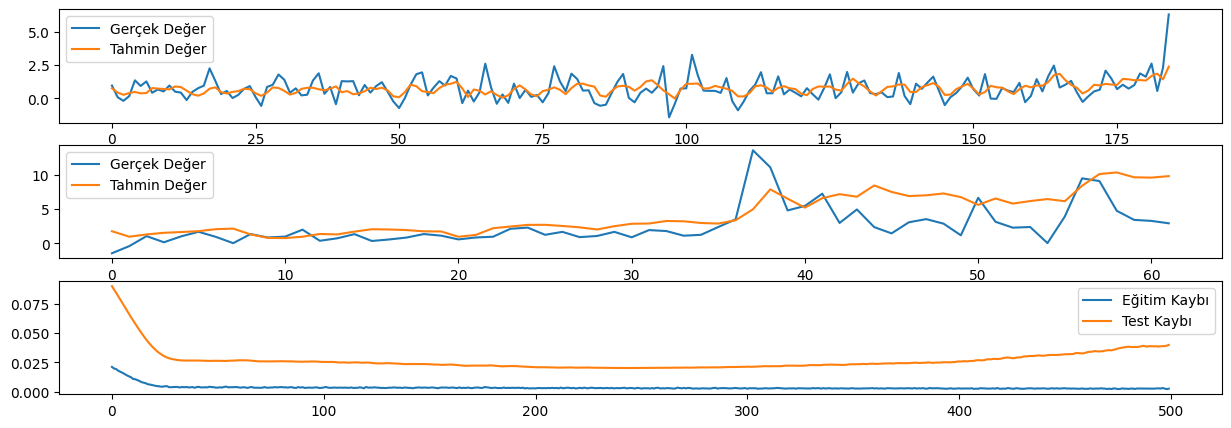

In [ ]:
trainl = history.history['loss']
testl = history.history['val_loss']

traintahmin = lstm_model.predict(x_train)
testtahmin = lstm_model.predict(x_test)

traintahmin_copy = np.repeat(traintahmin,x_train.shape[2],axis=-1)
testtahmin_copy = np.repeat(testtahmin,x_train.shape[2],axis=-1)
y_train_copy = np.repeat(y_train,x_train.shape[2],axis=-1)
y_test_copy = np.repeat(y_test,x_train.shape[2],axis=-1)

traintahmin == traintahmin_copy.reshape(len(traintahmin),x_train.shape[2])
testtahmin == testtahmin_copy.reshape(len(testtahmin),x_test.shape[2])
y_train == y_train_copy.reshape(len(y_train),x_train.shape[2])
y_test == y_test_copy.reshape(len(y_test),x_test.shape[2])

traintahmin = scaler.inverse_transform(traintahmin_copy)[:,0]
testtahmin = scaler.inverse_transform(testtahmin_copy)[:,0]
y_train = scaler.inverse_transform(y_train_copy)[:,0]
y_test = scaler.inverse_transform(y_test_copy)[:,0]

fig,axs = plt.subplots(3,1,figsize=(15,5))
axs[0].plot(y_train,label="Gerçek Değer")
axs[0].plot(traintahmin,label="Tahmin Değer")
axs[0].legend()
axs[1].plot(y_test,label="Gerçek Değer")
axs[1].plot(testtahmin,label="Tahmin Değer")
axs[1].legend()
axs[2].plot(trainl,label="Eğitim Kaybı")
axs[2].plot(testl,label="Test Kaybı")
axs[2].legend()
plt.show()

MSE:  0.7909047346868473
Test R2:  0.5822624972677635


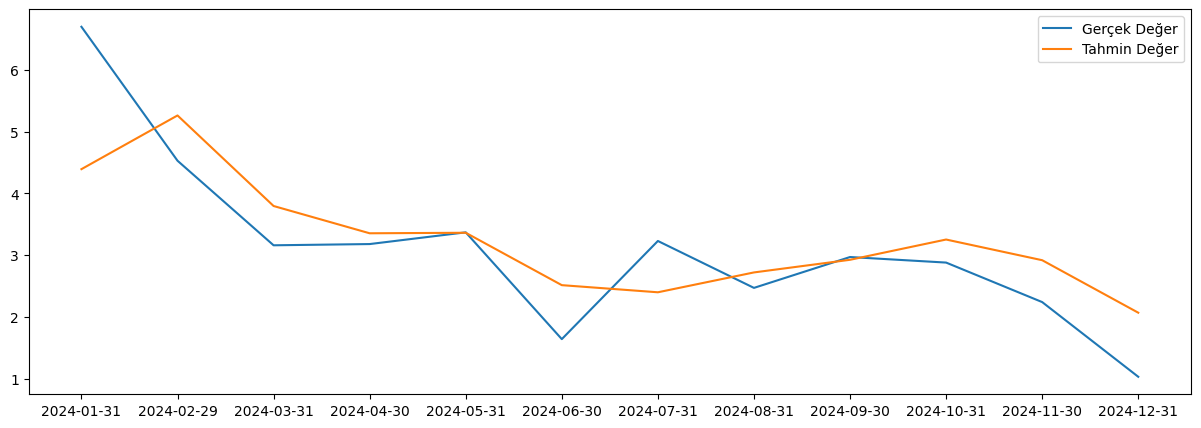

In [ ]:
veri_kont = pd.read_csv("/content/Enflasyon_Kontrol_Veri.csv",index_col=0)

x_kont = veri_kont.drop(columns=["Aylık Enf"])
y_kont = veri_kont["Aylık Enf"]

y_kont_pred = xgb_model_tuned.predict(x_kont)
print("MSE: ", mean_squared_error(y_kont, y_kont_pred))
print("Test R2: ", r2_score(y_kont, y_kont_pred))

fig,axs = plt.subplots(1,1,figsize=(15,5))
axs.plot(y_kont,label="Gerçek Değer")
axs.plot(y_kont_pred,label="Tahmin Değer")
axs.legend()
plt.show()

In [ ]:
y_kont_pred_series = pd.Series(y_kont_pred, index=y_kont.index, name="Tahmin Değer")
df = pd.concat([pd.DataFrame(y_kont), pd.DataFrame(y_kont_pred_series)], axis=1)
df.columns = ["Gerçek", "Tahmin"]

print(df)

            Gerçek    Tahmin
2024-01-31    6.70  4.393496
2024-02-29    4.53  5.263421
2024-03-31    3.16  3.796554
2024-04-30    3.18  3.354635
2024-05-31    3.37  3.363016
2024-06-30    1.64  2.514261
2024-07-31    3.23  2.398797
2024-08-31    2.47  2.720457
2024-09-30    2.97  2.925172
2024-10-31    2.88  3.253507
2024-11-30    2.24  2.918391
2024-12-31    1.03  2.068052


In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(x_train,y_train)
y_pred = lgb_model.predict(x_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Test R2: ", r2_score(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 484
[LightGBM] [Info] Number of data points in the train set: 186, number of used features: 8
[LightGBM] [Info] Start training from score 0.749677
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

boosting_type = ['gbdt','dart','goss']
num_leaves = range(1,20)
max_depth = range(1,20)
learning_rate = np.arange(0,1,0.0001)
n_estimators = [100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1050,1100,1150,1200,1250,1300,1350,1400,1450,1500]
objective = ['regression']
min_split_gain = range(0,10)
subsample = np.arange(0.5,1,0.01)
reg_alpha = np.arange(0,1,0.01)
reg_lambda = np.arange(0,1,0.01)
colsample_bytree = np.arange(0.5,1,0.01)

param_grid = {
    'boosting_type': boosting_type,
    'num_leaves': num_leaves,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'n_estimators': n_estimators,
    'objective': objective,
    'min_split_gain': min_split_gain,
    'subsample': subsample,
    'reg_alpha': reg_alpha,
    'reg_lambda': reg_lambda,
    'colsample_bytree': colsample_bytree
}

random_cv1 = RandomizedSearchCV(estimator=lgb_model,
            param_distributions=param_grid,
            cv=10, n_iter=1000,
            scoring = 'neg_mean_squared_error',n_jobs = -1,
            verbose = 5,
            return_train_score = True,
            random_state=42)

random_cv1.fit(x_train,y_train)
print(random_cv1.best_estimator_)


Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 484
[LightGBM] [Info] Number of data points in the train set: 186, number of used features: 8
[LightGBM] [Info] Start training from score 0.749677
LGBMRegressor(colsample_bytree=np.float64(0.9000000000000004),
              learning_rate=np.float64(0.0152), max_depth=19, min_split_gain=0,
              n_estimators=650, num_leaves=2, objective='regression',
              reg_alpha=np.float64(0.78), reg_lambda=np.float64(0.8),
              subsample=np.float64(0.8600000000000003))


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 10000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/lightgbm/sklearn.py", line 1189, in fit
    super().fit(
  File "/usr/local/lib/python3.11/dist-packages/lightgbm/sklearn.py", line 955, in fit
    self._Booster = train(
                    ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/lightgbm/engine.p

In [ ]:
lgb_model_tuned = lgb.LGBMRegressor(colsample_bytree=0.9,
              learning_rate=0.0152, max_depth=19, min_split_gain=0,
              n_estimators=650, num_leaves=2, objective='regression',
              reg_alpha=0.78, reg_lambda=0.8,
              subsample=0.86)
lgb_model_tuned.fit(x_train,y_train)
y_pred = lgb_model_tuned.predict(x_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Test R2: ", r2_score(y_test, y_pred))
print("Train R2: ", r2_score(y_train, lgb_model_tuned.predict(x_train)))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 484
[LightGBM] [Info] Number of data points in the train set: 186, number of used features: 8
[LightGBM] [Info] Start training from score 0.749677
MSE:  6.872667402060453
Test R2:  0.06976053289228956
Train R2:  0.6191166477057282


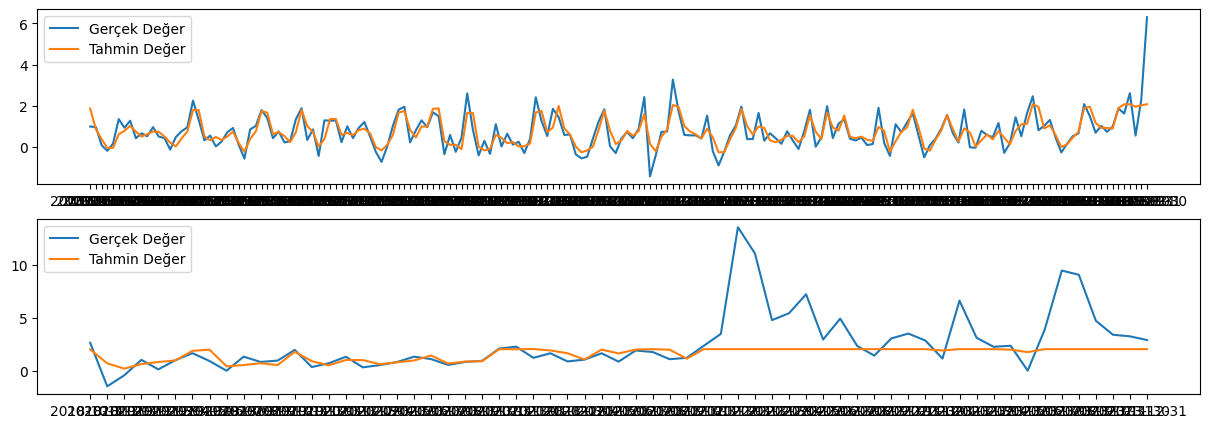

In [ ]:
traintahmin = lgb_model_tuned.predict(x_train)
testtahmin = lgb_model_tuned.predict(x_test)

fig,axs = plt.subplots(2,1,figsize=(15,5))
axs[0].plot(y_train,label="Gerçek Değer")
axs[0].plot(traintahmin,label="Tahmin Değer")
axs[0].legend()
axs[1].plot(y_test,label="Gerçek Değer")
axs[1].plot(testtahmin,label="Tahmin Değer")
axs[1].legend()
plt.show()

MSE:  2.984442675201055
Test R2:  -0.5763132720145248


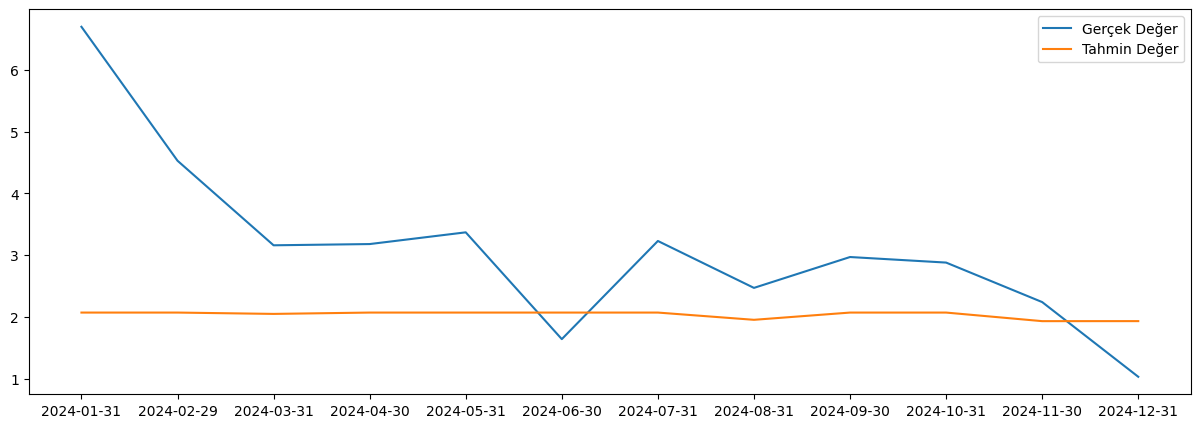

In [ ]:
veri_kont = pd.read_csv("/content/Enflasyon_Kontrol_Veri.csv",index_col=0)

x_kont = veri_kont.drop(columns=["Aylık Enf"])
y_kont = veri_kont["Aylık Enf"]

y_kont_pred = lgb_model_tuned.predict(x_kont)
print("MSE: ", mean_squared_error(y_kont, y_kont_pred))
print("Test R2: ", r2_score(y_kont, y_kont_pred))

fig,axs = plt.subplots(1,1,figsize=(15,5))
axs.plot(y_kont,label="Gerçek Değer")
axs.plot(y_kont_pred,label="Tahmin Değer")
axs.legend()
plt.show()

In [ ]:
y_kont_pred_series = pd.Series(y_kont_pred, index=y_kont.index, name="Tahmin Değer")
df2 = pd.concat([pd.DataFrame(y_kont), pd.DataFrame(y_kont_pred_series)], axis=1)
df2.columns = ["Gerçek", "Tahmin"]

print(df2)

            Gerçek    Tahmin
2024-01-31    6.70  2.070202
2024-02-29    4.53  2.070202
2024-03-31    3.16  2.048559
2024-04-30    3.18  2.070202
2024-05-31    3.37  2.070202
2024-06-30    1.64  2.070202
2024-07-31    3.23  2.070202
2024-08-31    2.47  1.952816
2024-09-30    2.97  2.070202
2024-10-31    2.88  2.070202
2024-11-30    2.24  1.931173
2024-12-31    1.03  1.931538


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 4.8 MB/s eta 0:00:00


In [ ]:
import catboost as cb
cb_model = cb.CatBoostRegressor()
cb_model.fit(x_train,y_train)
y_pred = cb_model.predict(x_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Test R2: ", r2_score(y_test, y_pred))
print("Train R2: ", r2_score(y_train, cb_model.predict(x_train)))

Learning rate set to 0.031388
0:	learn: 0.8498724	total: 57.3ms	remaining: 57.3s
1:	learn: 0.8389478	total: 73.7ms	remaining: 36.8s
2:	learn: 0.8283716	total: 97.5ms	remaining: 32.4s
3:	learn: 0.8186063	total: 101ms	remaining: 25.1s
4:	learn: 0.8103728	total: 115ms	remaining: 22.8s
5:	learn: 0.8015801	total: 129ms	remaining: 21.4s
6:	learn: 0.7939458	total: 135ms	remaining: 19.2s
7:	learn: 0.7863675	total: 147ms	remaining: 18.2s
8:	learn: 0.7768865	total: 148ms	remaining: 16.3s
9:	learn: 0.7680870	total: 151ms	remaining: 14.9s
10:	learn: 0.7584102	total: 168ms	remaining: 15.1s
11:	learn: 0.7498388	total: 172ms	remaining: 14.2s
12:	learn: 0.7422281	total: 177ms	remaining: 13.4s
13:	learn: 0.7351421	total: 179ms	remaining: 12.6s
14:	learn: 0.7283132	total: 196ms	remaining: 12.9s
15:	learn: 0.7218559	total: 203ms	remaining: 12.5s
16:	learn: 0.7157032	total: 204ms	remaining: 11.8s
17:	learn: 0.7085606	total: 206ms	remaining: 11.2s
18:	learn: 0.7023818	total: 208ms	remaining: 10.7s
19:	lear

In [ ]:
from sklearn.model_selection import GridSearchCV

model =cb.CatBoostRegressor()
parameters = {'depth' : [6,8,10],
              'learning_rate' : [0.0001,0.001,0.01,0.1],
              'iterations'    : [30, 50, 100,150,200,300,400,500,600,700,800,900,1000]}


grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 5, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_params_)

0:	learn: 0.8581432	total: 2.47ms	remaining: 2.22s
1:	learn: 0.8548031	total: 4.05ms	remaining: 1.82s
2:	learn: 0.8512204	total: 5.38ms	remaining: 1.61s
3:	learn: 0.8480168	total: 6.68ms	remaining: 1.5s
4:	learn: 0.8451616	total: 8.02ms	remaining: 1.43s
5:	learn: 0.8420681	total: 9.33ms	remaining: 1.39s
6:	learn: 0.8390132	total: 10.7ms	remaining: 1.37s
7:	learn: 0.8361626	total: 12.1ms	remaining: 1.34s
8:	learn: 0.8332798	total: 13.4ms	remaining: 1.33s
9:	learn: 0.8299632	total: 15ms	remaining: 1.33s
10:	learn: 0.8261889	total: 16.4ms	remaining: 1.32s
11:	learn: 0.8230531	total: 17.9ms	remaining: 1.32s
12:	learn: 0.8199752	total: 19.3ms	remaining: 1.31s
13:	learn: 0.8170144	total: 21ms	remaining: 1.33s
14:	learn: 0.8140672	total: 22.3ms	remaining: 1.32s
15:	learn: 0.8113894	total: 23.8ms	remaining: 1.32s
16:	learn: 0.8084690	total: 25.6ms	remaining: 1.33s
17:	learn: 0.8056966	total: 26.9ms	remaining: 1.32s
18:	learn: 0.8029661	total: 27.3ms	remaining: 1.26s
19:	learn: 0.8002198	total:

In [ ]:
cat_model_tuned = cb.CatBoostRegressor(depth=6,iterations=900,learning_rate=0.01)
cat_model_tuned.fit(x_train,y_train)
y_pred = cat_model_tuned.predict(x_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Test R2: ", r2_score(y_test, y_pred))
print("Train R2: ", r2_score(y_train, cat_model_tuned.predict(x_train)))

0:	learn: 0.8581432	total: 2.7ms	remaining: 2.43s
1:	learn: 0.8548031	total: 9.86ms	remaining: 4.42s
2:	learn: 0.8512204	total: 14.6ms	remaining: 4.35s
3:	learn: 0.8480168	total: 18.5ms	remaining: 4.14s
4:	learn: 0.8451616	total: 30.7ms	remaining: 5.5s
5:	learn: 0.8420681	total: 32.3ms	remaining: 4.81s
6:	learn: 0.8390132	total: 39ms	remaining: 4.97s
7:	learn: 0.8361626	total: 43ms	remaining: 4.79s
8:	learn: 0.8332798	total: 50.5ms	remaining: 5s
9:	learn: 0.8299632	total: 52.6ms	remaining: 4.68s
10:	learn: 0.8261889	total: 58.9ms	remaining: 4.76s
11:	learn: 0.8230531	total: 60.3ms	remaining: 4.46s
12:	learn: 0.8199752	total: 62.6ms	remaining: 4.27s
13:	learn: 0.8170144	total: 68.9ms	remaining: 4.36s
14:	learn: 0.8140672	total: 70.2ms	remaining: 4.14s
15:	learn: 0.8113894	total: 72.6ms	remaining: 4.01s
16:	learn: 0.8084690	total: 79.5ms	remaining: 4.13s
17:	learn: 0.8056966	total: 80.8ms	remaining: 3.96s
18:	learn: 0.8029661	total: 81.5ms	remaining: 3.78s
19:	learn: 0.8002198	total: 90.

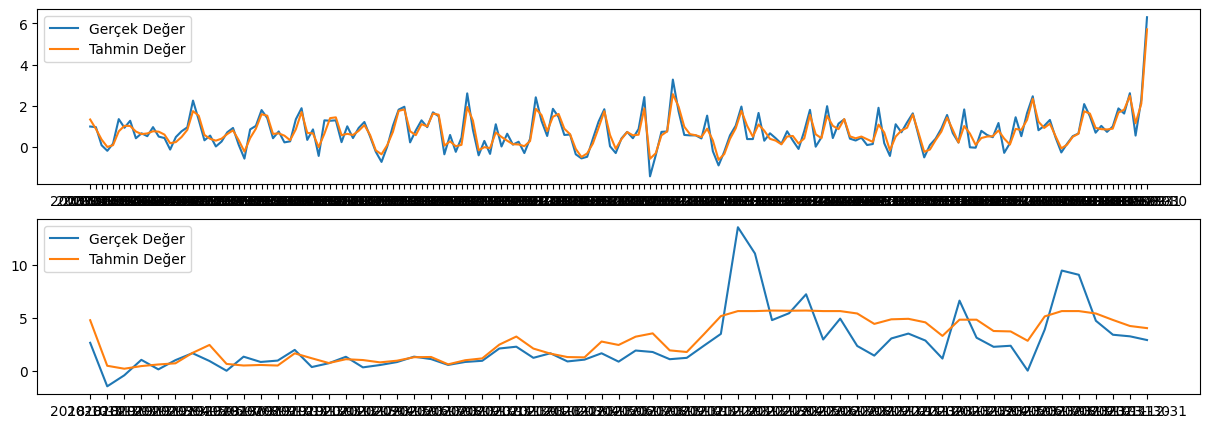

In [ ]:
traintahmin = cat_model_tuned.predict(x_train)
testtahmin = cat_model_tuned.predict(x_test)

fig,axs = plt.subplots(2,1,figsize=(15,5))
axs[0].plot(y_train,label="Gerçek Değer")
axs[0].plot(traintahmin,label="Tahmin Değer")
axs[0].legend()
axs[1].plot(y_test,label="Gerçek Değer")
axs[1].plot(testtahmin,label="Tahmin Değer")
axs[1].legend()
plt.show()

MSE:  1.9820831306951652
Test R2:  -0.04689025227814314


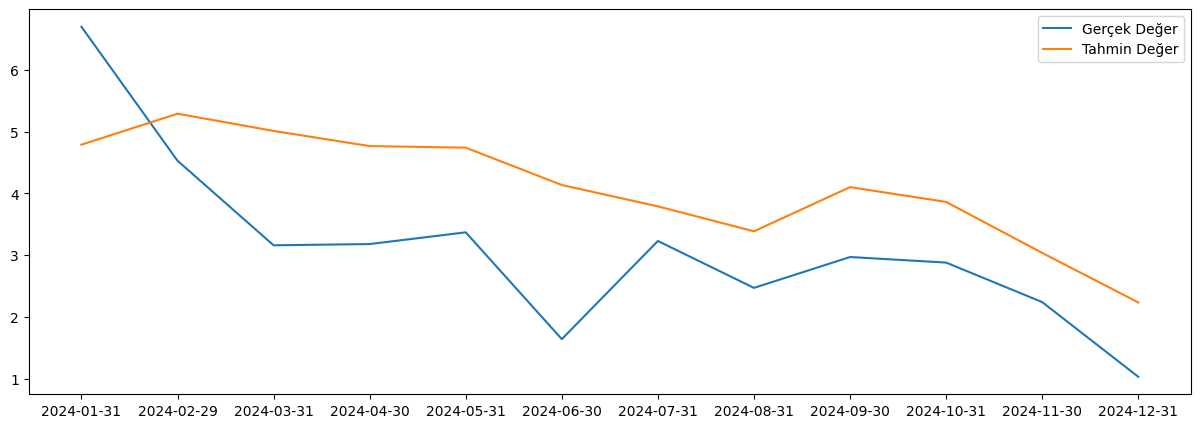

In [ ]:
veri_kont = pd.read_csv("/content/Enflasyon_Kontrol_Veri.csv",index_col=0)

x_kont = veri_kont.drop(columns=["Aylık Enf"])
y_kont = veri_kont["Aylık Enf"]

y_kont_pred = cat_model_tuned.predict(x_kont)
print("MSE: ", mean_squared_error(y_kont, y_kont_pred))
print("Test R2: ", r2_score(y_kont, y_kont_pred))

fig,axs = plt.subplots(1,1,figsize=(15,5))
axs.plot(y_kont,label="Gerçek Değer")
axs.plot(y_kont_pred,label="Tahmin Değer")
axs.legend(
plt.show()